In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/preprocessed_data.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,3,11,1,68,0,1617,4849
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,3,11,0,71,2,27,4299
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,3,11,0,60,0,776,4498
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,3,11,0,41,1,53,4325
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,3,11,0,44,1,422,4347


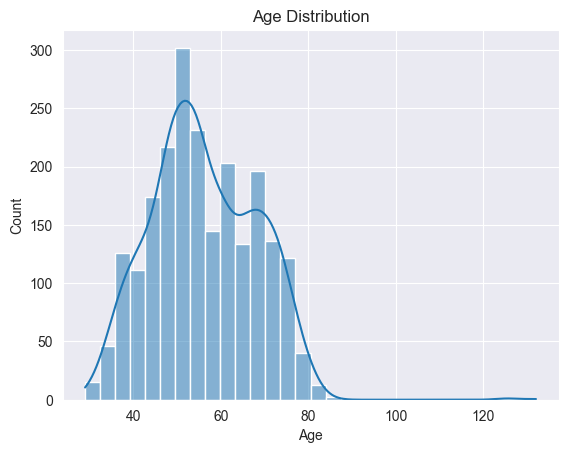

In [4]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

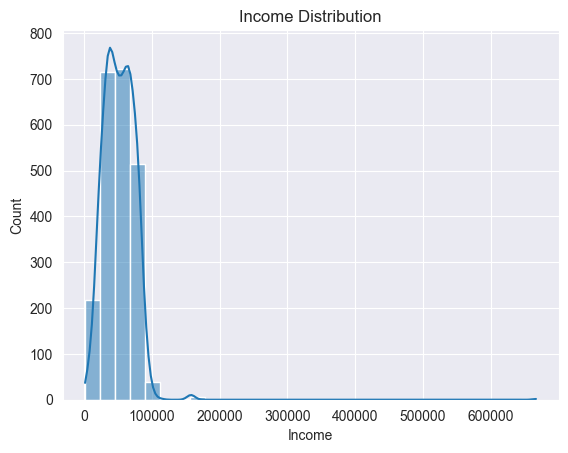

In [5]:
sns.histplot(df["Income"], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

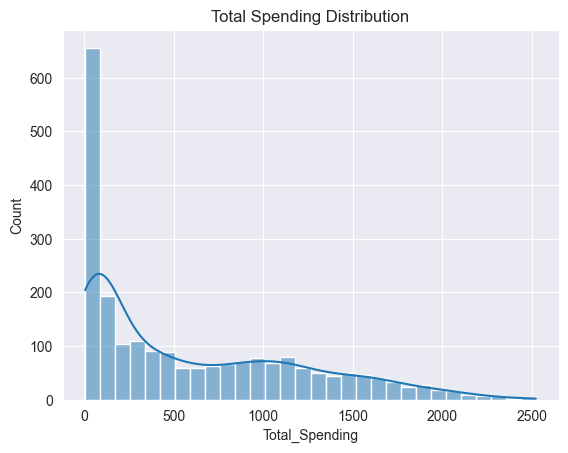

In [6]:
sns.histplot(df["Total_Spending"], bins=30, kde=True)
plt.title("Total Spending Distribution")
plt.show()

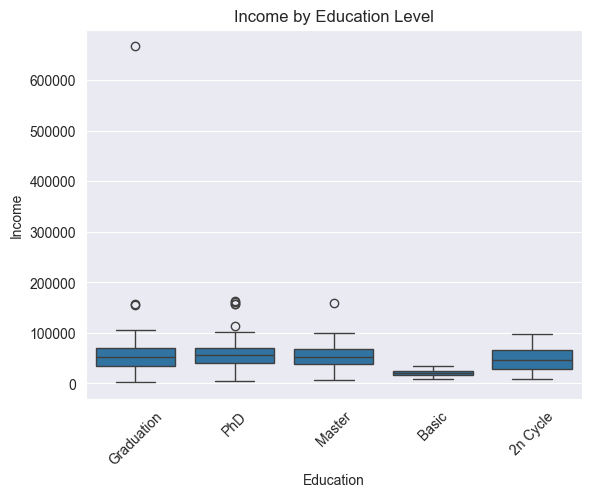

In [7]:
sns.boxplot(x="Education", y="Income", data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

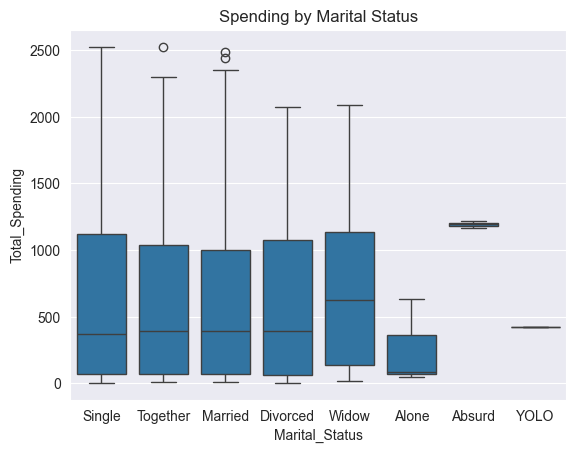

In [8]:
sns.boxplot(x="Marital_Status", y="Total_Spending", data=df)
plt.title("Spending by Marital Status")
plt.show()

In [9]:
corr = df[["Income", "Age", "Recency", "Total_Spending", "NumWebPurchases", "NumStorePurchases"]].corr()
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


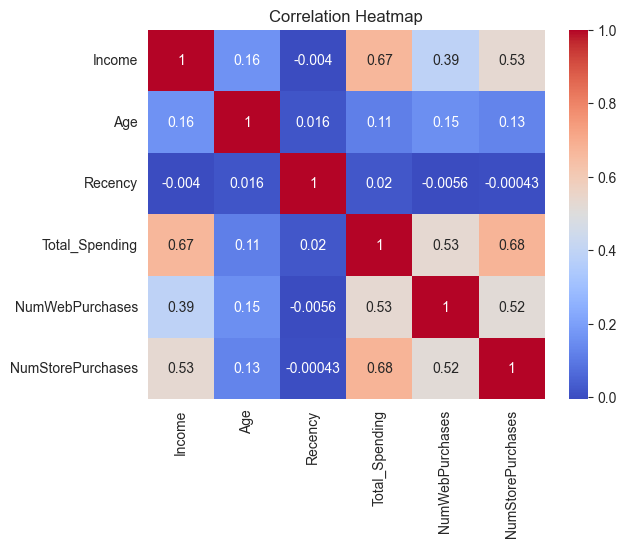

In [10]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
pivot_income = df.pivot_table(values="Income", index="Education", columns="Marital_Status", aggfunc="mean")
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


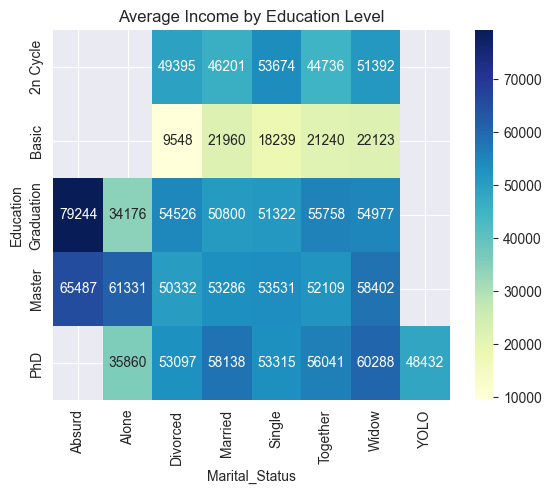

In [12]:
sns.heatmap(pivot_income, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Average Income by Education Level")
plt.show()

In [13]:
group1 = df.groupby("Education")["Total_Spending"].mean().round(2).sort_values(ascending=False)
group1

Education
PhD           676.73
Graduation    621.69
Master        609.77
2n Cycle      494.93
Basic          81.80
Name: Total_Spending, dtype: float64

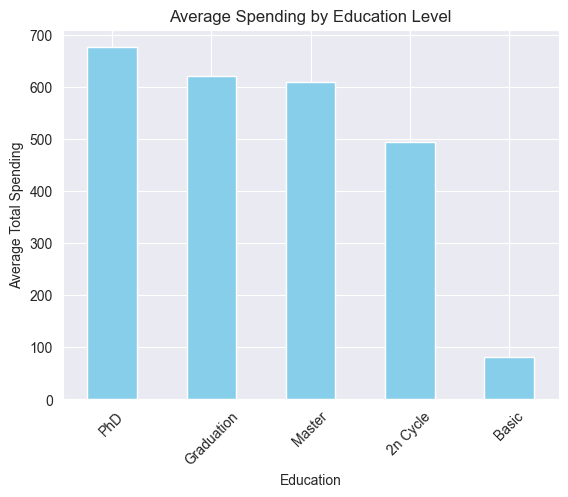

In [14]:
group1.plot(kind="bar", color="skyblue")
plt.title("Average Spending by Education Level")
plt.ylabel("Average Total Spending")
plt.xticks(rotation=45)
plt.show()

In [15]:
df["AcceptedAny"] = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum(axis=1)
df["AcceptedAny"]

0       1
1       0
2       0
3       0
4       0
       ..
2211    0
2212    1
2213    1
2214    0
2215    1
Name: AcceptedAny, Length: 2216, dtype: int64

In [16]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5])

In [17]:
df["AcceptedAny"] = df["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0)
df["AcceptedAny"].unique()

array([1, 0])

In [18]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().round(2).sort_values(ascending=False)
group2

Marital_Status
Absurd      0.50
YOLO        0.50
Widow       0.34
Alone       0.33
Single      0.31
Divorced    0.30
Married     0.25
Together    0.25
Name: AcceptedAny, dtype: float64

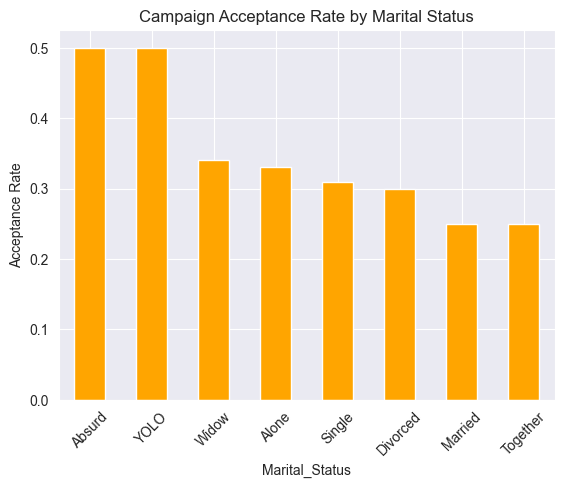

In [19]:
group2.plot(kind="bar", color="orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.show()

In [20]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)
df["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2211    50-59
2212      70+
2213    40-49
2214    60-69
2215      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [23]:
group3 = df.groupby("AgeGroup")["Income"].mean().round(2)
group3

C:\Users\mgrun\AppData\Local\Temp\ipykernel_20996\3268467767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean().round(2)


AgeGroup
18-29    46658.00
30-39    46283.03
40-49    49224.88
50-59    50812.91
60-69    56200.83
70+      58944.32
Name: Income, dtype: float64

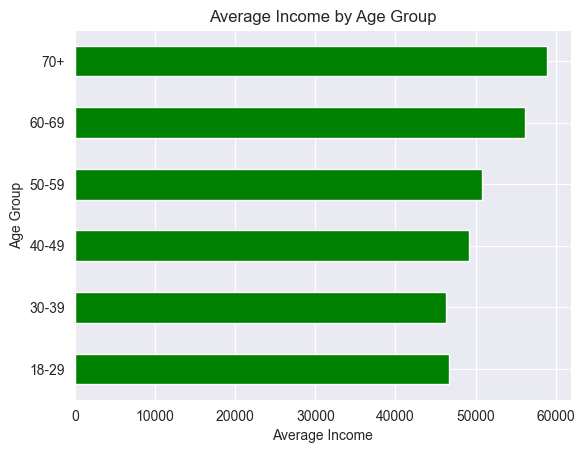

In [22]:
group3.plot(kind="barh", color="green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.ylabel("Age Group")
plt.show()